Epoch 1/14


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9861 - loss: 0.0828 - val_accuracy: 0.9983 - val_loss: 0.0151
Epoch 2/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9987 - loss: 0.0065 - val_accuracy: 0.9986 - val_loss: 0.0099
Epoch 3/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 4/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 5/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 6/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 7/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9994 - val_loss: 0.0040
Epoch 8/14
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0

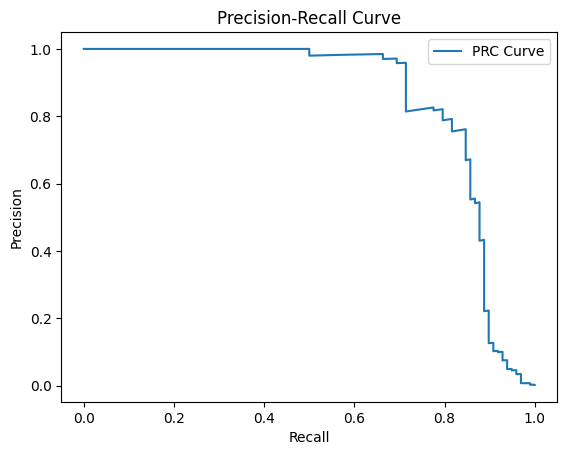

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, ReLU

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target
X = data.drop(['Class'], axis=1)
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for Conv1D: (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, input_shape=(X_train.shape[1], 1)),
    ReLU(),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=2),
    ReLU(),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(100),
    ReLU(),
    Dropout(0.5),
    Dense(50),
    ReLU(),
    Dense(25),
    ReLU(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 14 epochs
history = model.fit(X_train, y_train, epochs=14, batch_size=2048, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
auc = roc_auc_score(y_test, y_pred_prob)
prc_precision, prc_recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Print Metrics
print("CNN Model Metrics (14 Epochs):")
print(f"Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Confusion Matrix: {cm}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")
print("Total fraud transactions in test set:", np.sum(y_test))
from sklearn.metrics import auc  # Make sure this is imported

prc_auc = auc(prc_recall, prc_precision)
print(f"PRC (AUC of Precision-Recall Curve): {prc_auc:.4f}")


# Plot Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prc_recall, prc_precision, label="PRC Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()